📊 Grouped Stats:
                Closed PnL        Size USD Account
                     mean median     mean   count
classification                                   
Fear                49.21    0.0  7182.01   83237
Greed               53.88    0.0  4574.42   90295
Neutral             34.31    0.0  4782.73   37686

✅ Win Rates (%):
 classification
Fear       40.79
Greed      42.03
Neutral    39.70
Name: Profitable, dtype: float64


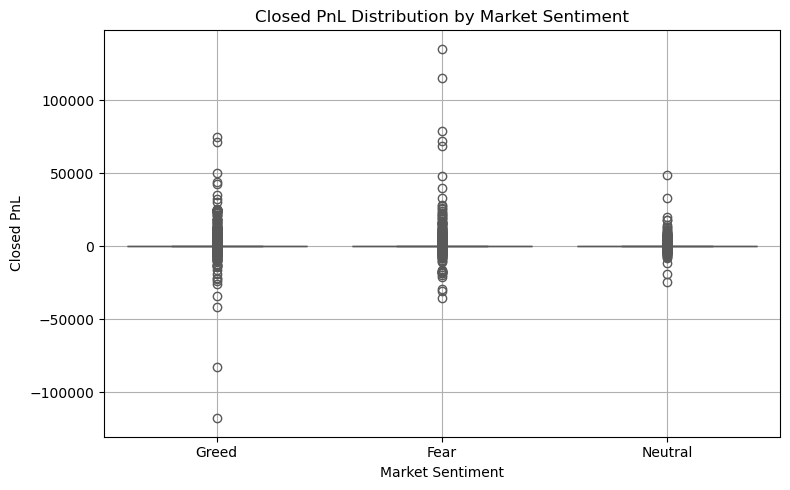


🏆 Top Traders During Fear:
 Account
0x083384f897ee0f19899168e3b1bec365f52a9012    1.238143e+06
0xbaaaf6571ab7d571043ff1e313a9609a10637864    8.827904e+05
0x4acb90e786d897ecffb614dc822eb231b4ffb9f4    4.634781e+05
0x72c6a4624e1dffa724e6d00d64ceae698af892a0    3.434149e+05
0x513b8629fe877bb581bf244e326a047b249c4ff1    2.960444e+05
0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3    2.745103e+05
0x8170715b3b381dffb7062c0298972d4727a0a63b    1.640062e+05
0x420ab45e0bd8863569a5efbb9c05d91f40624641    1.091094e+05
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23    1.027101e+05
0xbee1707d6b44d4d52bfe19e41f8a828645437aab    8.675289e+04
Name: Closed PnL, dtype: float64

🏆 Top Traders During Greed:
 Account
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23    1.639363e+06
0xbee1707d6b44d4d52bfe19e41f8a828645437aab    7.222110e+05
0x72743ae2822edd658c0c50608fd7c5c501b2afbd    4.535953e+05
0x430f09841d65beb3f27765503d0f850b8bce7713    3.519654e+05
0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4    3.066642e+05
0x08338

In [7]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load local CSV files (make sure they are in the same folder as this notebook)
trader_df = pd.read_csv("historical_data.csv")
sentiment_df = pd.read_csv("fear_greed_index.csv")

# Format timestamp to date
trader_df['date'] = pd.to_datetime(trader_df['Timestamp IST'], format="%d-%m-%Y %H:%M").dt.date
trader_df['date'] = trader_df['date'].astype(str)

# Clean sentiment labels (remove 'Extreme ')
sentiment_df['classification'] = sentiment_df['classification'].str.replace('Extreme ', '', regex=False)

# Merge datasets on date
merged_df = pd.merge(trader_df, sentiment_df[['date', 'classification']], on='date', how='left')

# Convert numeric columns
merged_df['Closed PnL'] = pd.to_numeric(merged_df['Closed PnL'], errors='coerce')
merged_df['Size USD'] = pd.to_numeric(merged_df['Size USD'], errors='coerce')

# Drop rows with missing sentiment and make a safe copy
filtered_df = merged_df.dropna(subset=['classification']).copy()

# Add Profitable column
filtered_df['Profitable'] = filtered_df['Closed PnL'] > 0

# Grouped stats
grouped_stats = filtered_df.groupby('classification').agg({
    'Closed PnL': ['mean', 'median'],
    'Size USD': 'mean',
    'Account': 'count'
}).round(2)

# Win rate
win_rate = (filtered_df.groupby('classification')['Profitable'].mean() * 100).round(2)

# Display stats
print("📊 Grouped Stats:\n", grouped_stats)
print("\n✅ Win Rates (%):\n", win_rate)

# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=filtered_df, x='classification', y='Closed PnL', hue='classification', palette='Set2', legend=False)
plt.title("Closed PnL Distribution by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Closed PnL")
plt.grid(True)
plt.tight_layout()
plt.show()

# Top 10 traders during Fear
fear_df = filtered_df[filtered_df['classification'] == 'Fear']
top_fear = fear_df.groupby('Account')['Closed PnL'].sum().sort_values(ascending=False).head(10)

# Top 10 traders during Greed
greed_df = filtered_df[filtered_df['classification'] == 'Greed']
top_greed = greed_df.groupby('Account')['Closed PnL'].sum().sort_values(ascending=False).head(10)

# Print top traders
print("\n🏆 Top Traders During Fear:\n", top_fear)
print("\n🏆 Top Traders During Greed:\n", top_greed)

# Final insights (printed instead of markdown to avoid errors)
print("\n📌 Final Insights:")
print("- Traders perform slightly better on average during Greed periods than Fear, with higher average PnL and win rate.")
print("- Trade sizes are larger during Fear, indicating higher capital deployment but potentially lower confidence.")
print("- Some top-performing traders consistently appear in both sentiments, showing adaptability.")
print("- Recommendation: Incorporate market sentiment data in strategy to optimize leverage and entry points.")
